In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Let us write the code for the ladder problem

def ratio(z):
    T = np.array([[1+z,1,1],
                  [2*z,z,0],
                  [z**2,0,0,],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]
    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    return eigvals_abs[-1]/eigvals_abs[-2]  ## Return the ratio of the largest to the second largest eigenvalue

def ratio_notabs(z):
    T = np.array([[1+z,1,1],
                  [2*z,z,0],
                  [z**2,0,0,],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]

    #Sort eigvals in the same order as eigvals_abs
    eigvals = [eigvals[i] for i in np.argsort(eigvals_abs)]
    #print(eigvals)

    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    
    #print(eigvals_abs)
    return eigvals[-1]/eigvals[-2]

In [4]:
def argand2(a):
    for x in range(len(a)):
        plt.plot([a[x].real],[a[x].imag],'o',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title("Points close to 1 for {} angles, {} steps, z = {} start point".format(num_angles,max_steps,z_int_c))
    plt.grid()
    plt.show()

In [4]:
## Let us try to draw a heatmap image of the distance from 1

#Firstly we create a 100 x 100 grid of points in the complex plane

x = np.linspace(-25,25,1001)
y = np.linspace(-25,25,1001)

data = np.zeros((1001,1001))

for i in range(1001):
    for j in range(1001):
        data[j,i] = abs(ratio(x[i] + 1j*y[j]) - 1)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Heatmap of distance from 1')

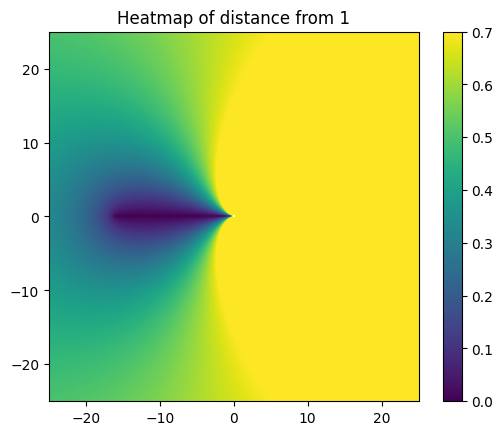

In [6]:
## Now we plot the heatmap

plt.imshow(data, extent = (-25,25,-25,25), cmap = 'viridis', origin = 'lower', vmin=0, vmax=0.7)
plt.colorbar()
plt.title("Heatmap of distance from 1")

In [5]:
def highest_eigval(z):
    T = np.array([[1+z,1,1],
                  [2*z,z,0],
                  [z**2,0,0,],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]

    #Sort eigvals in the same order as eigvals_abs
    eigvals = [eigvals[i] for i in np.argsort(eigvals_abs)]
    #print(eigvals)

    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    
    #print(eigvals_abs)
    return eigvals[-1]

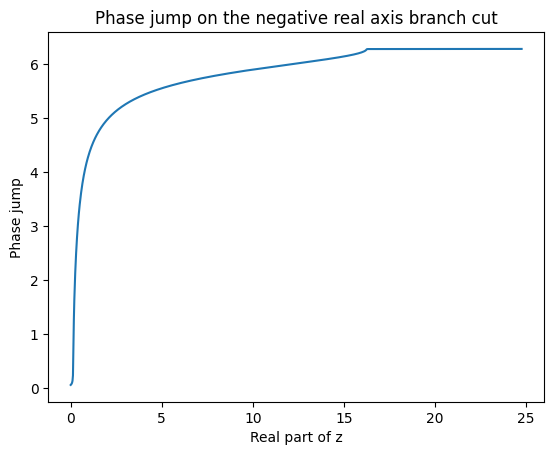

In [6]:
#Now, let us try to see how does the phase jump on the negative real axis branch cut 

vals = np.linspace(-25,-0.25,1000)

epsilon = 0.01

abs_vals = [abs(z + 0.25) for z in vals]

z_arr_above = [val + epsilon*1j for val in vals]
z_arr_below = [val - epsilon*1j for val in vals]

phase_above = [np.angle(highest_eigval(z + 0.25)) for z in z_arr_above]
phase_below = [np.angle(highest_eigval(z + 0.25)) for z in z_arr_below]

phase_jump = [phase_above[i] - phase_below[i] for i in range(len(phase_above))]


plt.plot(abs_vals,phase_jump)
plt.title("Phase jump on the negative real axis branch cut")
plt.xlabel("Real part of z")
plt.ylabel("Phase jump")
plt.show()



In [7]:
print(phase_above)
print(phase_below)

[3.141135081844789, 3.1411345172683496, 3.1411339510895413, 3.141133383300154, 3.141132813891911, 3.1411322428564676, 3.14113167018541, 3.141131095870254, 3.1411305199024455, 3.1411299422733596, 3.141129362974298, 3.1411287819964904, 3.141128199331091, 3.1411276149691805, 3.141127028901764, 3.1411264411197686, 3.1411258516140443, 3.141125260375363, 3.141124667394417, 3.1411240726618175, 3.141123476168094, 3.141122877903695, 3.141122277858983, 3.141121676024238, 3.1411210723896534, 3.141120466945336, 3.141119859681305, 3.1411192505874896, 3.14111863965373, 3.141118026869775, 3.14111741222528, 3.141116795709808, 3.141116177312827, 3.1411155570237073, 3.1411149348317244, 3.1411143107260537, 3.1411136846957706, 3.1411130567298495, 3.141112426817163, 3.1411117949464784, 3.1411111611064593, 3.141110525285661, 3.1411098874725316, 3.1411092476554097, 3.141108605822522, 3.1411079619619837, 3.1411073160617944, 3.1411066681098396, 3.141106018093886, 3.141105366001583, 3.1411047118204576, 3.141104

C:\Users\DELL\AppData\Local\Temp\ipykernel_4312\489873221.py:7: RuntimeWarning: divide by zero encountered in power
  return a*np.arctan(x**c) #+ d
C:\Users\DELL\AppData\Local\Temp\ipykernel_4312\489873221.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters, pcov = opt.curve_fit(func, xdata, ydata)


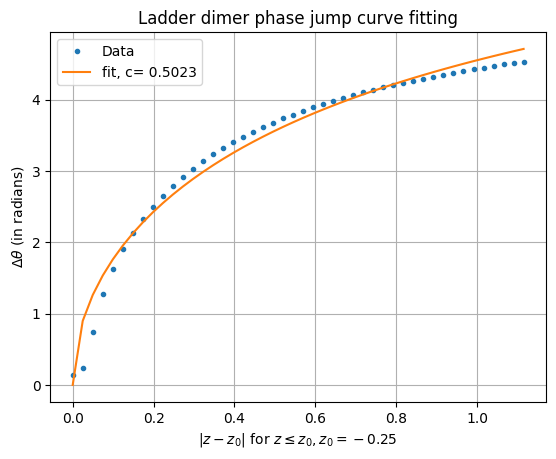

In [14]:
## Let us use matplot lib curve fitting to estimate the power
import scipy.optimize as opt
xdata = np.array(abs_vals[950:996])
ydata = np.array(phase_jump[950:996])

def func(x,a,c,d):  ## Function to fit, power law
    return a*np.arctan(x**c) #+ d 
# The actual curve fitting happens here
min_val = np.min(xdata)
xdata = np.array([z - min_val for z in xdata])
optimizedParameters, pcov = opt.curve_fit(func, xdata, ydata)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, ydata, ".", label="Data")
plt.plot(xdata, func(xdata, *optimizedParameters), label=f"fit, c= {round(optimizedParameters[1],4)}")

# Show the graph
plt.legend()
plt.title("Ladder dimer phase jump curve fitting")
plt.ylabel(r"$\Delta \theta$ (in radians)")
plt.xlabel(r"$|z - z_0|$ for $z \leq z_0,  z_0 = -0.25 $")
plt.grid()
plt.show()

In [34]:
print(optimizedParameters)

[0.45809007 3.17377989]
